In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [51]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [52]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [53]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [54]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
most_recent_date= session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

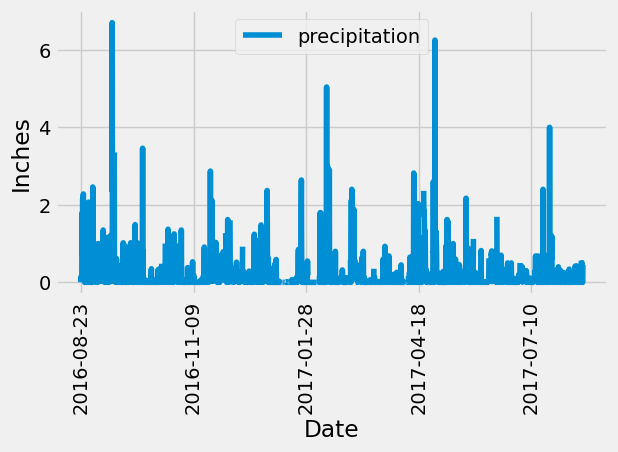

In [57]:
from datetime import datetime, timedelta

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date="2017/08/23"
most_recent_date=datetime.strptime(most_recent_date,"%Y/%m/%d")
# Calculate the date one year from the last date in data set.
one_year_before_date=most_recent_date-timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
precipitation_data=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= one_year_before_date).filter(Measurement.date<= most_recent_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df=pd.DataFrame(precipitation_data,columns=["date","precipitation"])

# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date",y="precipitation",kind="line")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats=precipitation_df["precipitation"].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(func.count(Station.station)).all()
total_stations

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_list=[]

for station in most_active_stations:
    station_list.append((station[0],station[1]))

station_list

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = station_list[0][0]

temperatures = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
min_temp, max_temp, avg_temp = temperatures[0]

temperatures

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data=session.query(Measurement.tobs).filter(Measurement.date>=one_year_before_date).filter(Measurement.date<=most_recent_date).filter(Measurement.station == most_active_station_id).all()

temperatures = [temp[0] for temp in temperature_data]

plt.hist(temperatures, bins=12, color='blue', label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

plt.show()

# Close Session

In [ ]:
# Close Session
session.close()